# MAT 201A - ASSIGNMENT 4
### AMBIKA YADAV

## IDENTIFYING PROMINENT PEAKS IN AUDIOS

Three wav files have been given .I have computed the DFT of the entire file using fft.rfft and then identify the index of the most prominent peak in its magnitude spectrum.
The procedure has been commented with the work flow.

In [1]:
%pylab inline
rcParams['figure.figsize'] = (10, 4)
from __future__ import print_function
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.io import wavfile
from scipy.signal import freqs
sr_a, sample_a = wavfile.read('glockenspiel.wav')
sr_b, sample_b = wavfile.read('piano.wav')
sr_c, sample_c = wavfile.read('tom.wav')

In [3]:
def assignment4(sr_1,sample_1):
    # FINDING THE MAGNITUDE SPECTRUM USING fft.rfft and normalising the magnitude
    sample1_f=fft.rfft(sample_1,len(sample_1))
    magspec = abs(sample1_f)/(len(sample_1)/2)
    # FINDING THE FREQUENCY BINS AS HERTZ
    length= int((len(sample_1)/2)+1)
    freq=[]
    for i in range(0,length):
        freq.append((i*sr_1)/len(sample_1))
    # COMPUTING THE TOTAL ENERGY
    T_Energy=sum(magspec)
    # HARD CODING TO FIND THE CUTOFF FREQUENCY , ASSUMING 0.95*TOTALENERGY
    CO_Bin=where(cumsum(magspec)>=0.95 *T_Energy)[0][0]
    CO_frequency=CO_Bin*sr_1/len(sample_1)
    # PLOT 1 - FREQUENCY VS MAGNITUDE
    subplot(1,2,1)
    plot(freq,magspec)
    plt.axvline(CO_frequency,color='red', linestyle='--',label='{:2f}Hz'.format(CO_frequency))
    legend()
    title('FREQUENCY VS MAGNITUDE')
    xlabel('Frequency in Hz')
    ylabel('Magnitude')
    # PLOT 2 - FREQUENCY VS MAGNITUDE IN DB
    subplot(1,2,2)
    plot(freq,20*log10(magspec/T_Energy))
    xlim(0,CO_frequency)
    title('FREQUENCY VS MAGNITUDE')
    xlabel('Frequency in Hz')
    ylabel('Magnitude in db')
    gcf().set_figheight(7)
    gcf().set_figwidth(20)
    # CALCULATING PEAKBIN AND PEAKFREQ
    peakbin=argmax(magspec)
    peakfreq=peakbin*sr_1/len(sample_1)
    print('The peak frequency is {:f}'.format(peakfreq))
    print('The cut-off frequency is {:f}'.format(CO_frequency))
    

GLOCKENSPIEL ANALYSIS
The peak frequency is 1323.342835
The cut-off frequency is 5736.771184


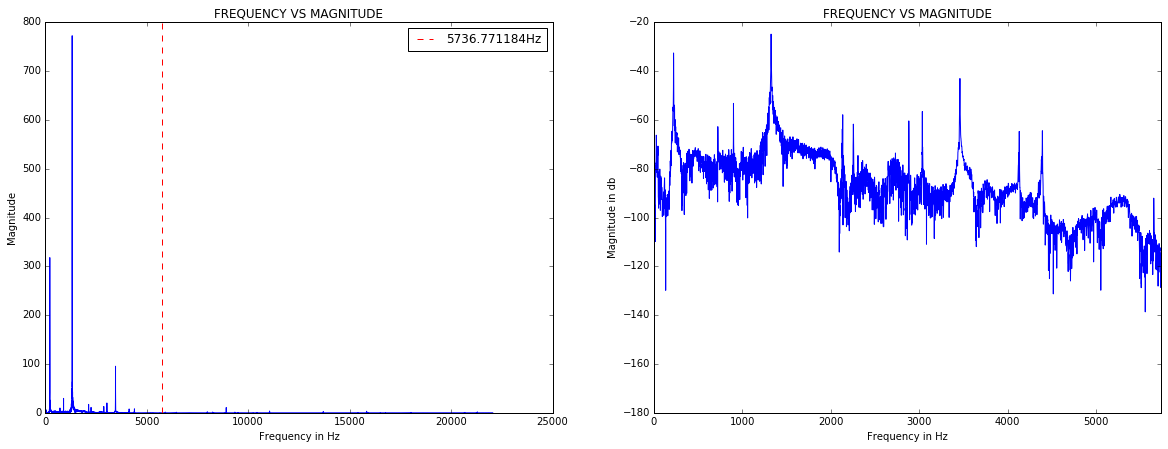

In [4]:
print("GLOCKENSPIEL ANALYSIS")
assignment4(sr_a,sample_a)


PIANO ANALYSIS
The peak frequency is 78.057861
The cut-off frequency is 2247.528076


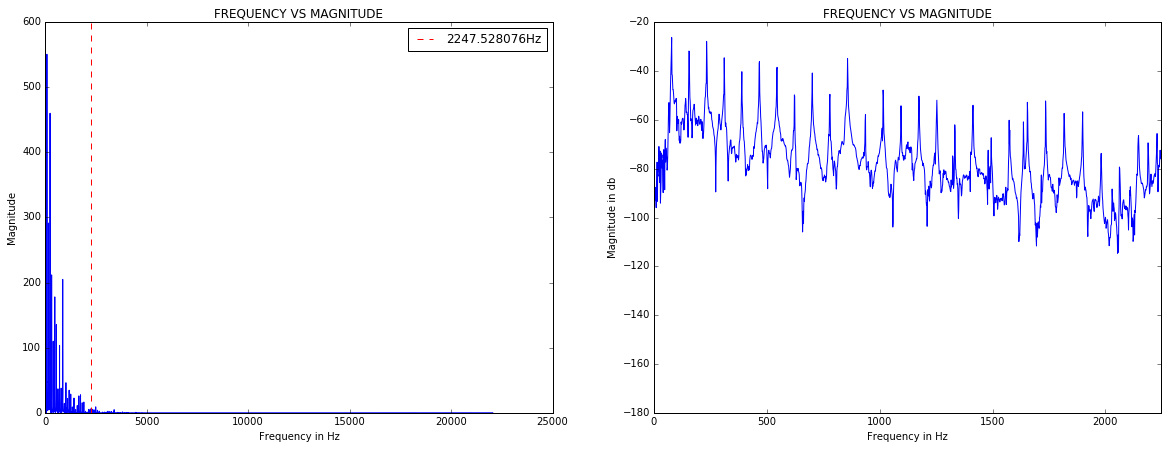

In [5]:
print("PIANO ANALYSIS")
assignment4(sr_b,sample_b)

TOM ANALYSIS
The peak frequency is 92.565431
The cut-off frequency is 9894.216118


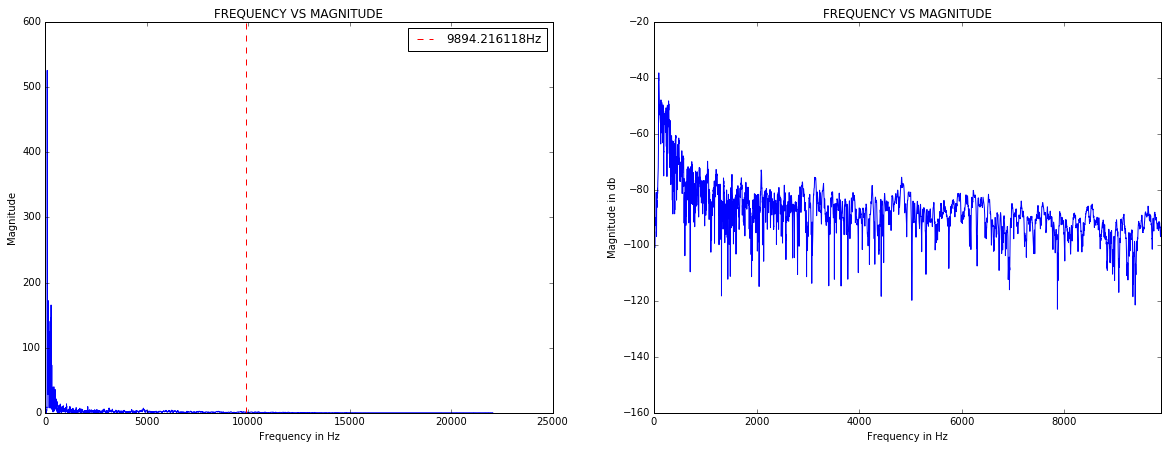

In [6]:
print("TOM ANALYSIS")
assignment4(sr_c,sample_c)